In [117]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sentence_transformers import SentenceTransformer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [118]:
movies = pd.read_json('../data/movies.jsonl.gz', lines=True)
# movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))
ratings = pd.read_csv('../data/ratings.csv')
# movies['genres'] = movies['genres'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", '')

In [119]:
movies['genres'] = movies['genres'].apply(lambda x: [i.lower() for i in x])
movies['actors'] = movies['actors'].apply(lambda x: [i.lower() for i in x])

In [120]:
from collections import Counter

genres_counts = Counter(str(g) for genres in movies['genres'] for g in genres)
# genres_counts = Counter(str(g).lower().strip() for genres in movies['genres'] for g in genres.split(","))
print(f"There are {len(genres_counts)} genre labels.")
genres_counts

actors_counts = Counter(str(a) for actors in movies['actors'] for a in actors)
print(f"There are {len(actors_counts)} actor labels.")
actors_counts

There are 25 genre labels.
There are 34500 actor labels.


Counter({'frank welker': 168,
         'grey delisle': 97,
         'samuel l. jackson': 96,
         'bruce willis': 88,
         'fred tatasciore': 86,
         'tara strong': 80,
         'kevin michael richardson': 78,
         'jim cummings': 71,
         'nicolas cage': 68,
         'koichi yamadera': 66,
         'jackie chan': 66,
         'ikue otani': 65,
         'robert de niro': 64,
         'jeff bennett': 60,
         'liam neeson': 60,
         'willem dafoe': 58,
         'morgan freeman': 57,
         'tom kenny': 56,
         'sylvester stallone': 56,
         'megumi hayashibara': 56,
         'matt damon': 55,
         'dee bradley baker': 55,
         'tress macneille': 55,
         'j.k. simmons': 54,
         'shin-ichiro miki': 54,
         'john dimaggio': 54,
         'tom hanks': 53,
         'kappei yamaguchi': 53,
         'antonio banderas': 52,
         'brad pitt': 50,
         'mayumi tanaka': 49,
         'john leguizamo': 49,
         'johnny depp': 

In [121]:
movies['year'] = movies['year'].astype(int)
def round_down(year):
    return year - (year%10)

round_down(1932)

1930

In [122]:
movies['decade'] = movies['year'].apply(round_down)

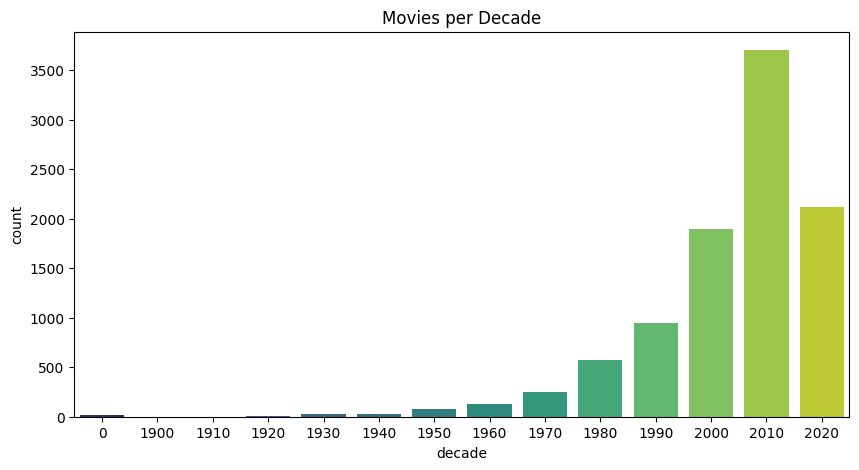

In [123]:
plt.figure(figsize=(10,5))
sns.countplot(x='decade', data=movies, palette='viridis')   
plt.title('Movies per Decade')
plt.show()

In [124]:
print("The 5 most common genres: \n", genres_counts.most_common(5))
print("The 5 most common actors: \n", actors_counts.most_common(5))

The 5 most common genres: 
 [('drama', 3513), ('comedy', 2601), ('action', 2526), ('thriller', 1892), ('adventure', 1532)]
The 5 most common actors: 
 [('frank welker', 168), ('grey delisle', 97), ('samuel l. jackson', 96), ('bruce willis', 88), ('fred tatasciore', 86)]


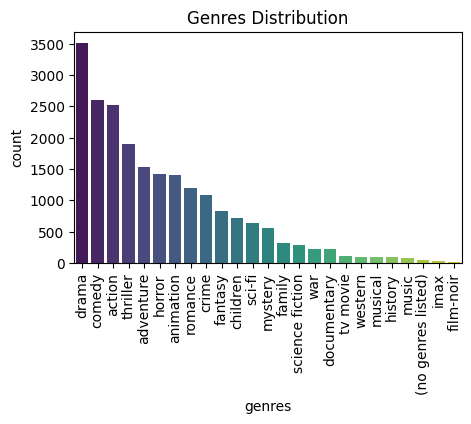

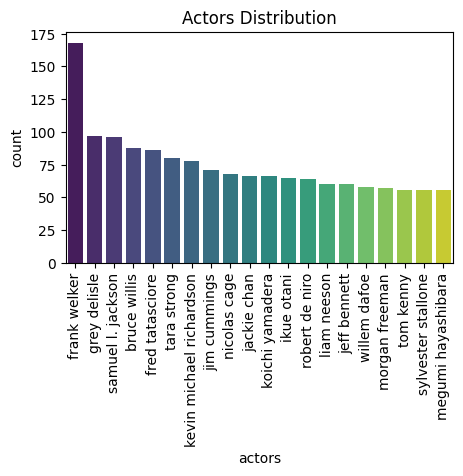

In [125]:
genres_counts_df = pd.DataFrame([genres_counts]).T.reset_index()
genres_counts_df.columns = ['genres', 'count']
genres_counts_df = genres_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(5,3))
sns.barplot(x='genres', y='count', data=genres_counts_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Genres Distribution')
plt.show()

actors_counts_df = pd.DataFrame([actors_counts]).T.reset_index()
actors_counts_df.columns = ['actors', 'count']
actors_counts_df = actors_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(5,3))
sns.barplot(x='actors', y='count', data=actors_counts_df.head(20), palette='viridis')
plt.xticks(rotation=90)
plt.title('Actors Distribution')
plt.show()

In [126]:
movies['combined_text_features'] = movies['overview'].str.lower() + " " +  \
                                   movies['director'].str.lower() + " " +  \
                                   movies['actors'].apply(" ".join)


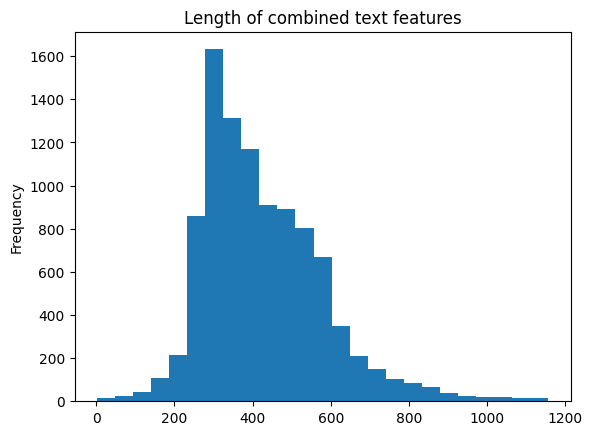

In [141]:
movies['combined_text_features'] = movies['combined_text_features'].str.replace('[^\t\n]','')
# plotting lenght of combined text features
movies['combined_text_features'].str.len().plot.hist(bins = 25)
plt.title('Length of combined text features')
plt.show()

In [127]:
movies

,id,title,overview,tags,genres,director,actors,characters,year,votes,rating,popularity,budget,url,decade,combined_text_features
0,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...",[],"[action, fantasy, science fiction]",Jaume Collet-Serra,"[sarah shahi, dwayne johnson, henry cavill, pi...","[Adrianna Tomaz, Black Adam / Teth Adam, Clark...",2022,1144,6.863,6202.882,200000000,https://image.tmdb.org/t/p/w154/pFlaoHTZeyNkG8...,2020,"nearly 5,000 years after he was bestowed with ..."
1,882598,Smile,"After witnessing a bizarre, traumatic incident...",[],"[horror, mystery, thriller]",Parker Finn,"[kyle gallner, sosie bacon, caitlin stasey, ka...","[Joel, Dr. Rose Cotter, Laura Weaver, Dr. Morg...",2022,615,6.808,3910.444,17000000,https://image.tmdb.org/t/p/w154/aPqcQwu4VGEewP...,2020,"after witnessing a bizarre, traumatic incident..."
2,505642,Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",[],"[action, adventure, science fiction]",Ryan Coogler,"[letitia wright, angela bassett, tenoch huerta...","[Shuri, Ramonda, Namor, N'Jadaka / Erik 'Killm...",2022,718,7.512,3492.065,250000000,https://image.tmdb.org/t/p/w154/sv1xJUazXeYqAL...,2020,"queen ramonda, shuri, m’baku, okoye and the do..."
3,966220,Sniper: The White Raven,Mykola is an eccentric pacifist who wants to b...,[],"[drama, action, war]",Marian Bushan,"[maryna koshkina, roman semysal, andrei mostre...","[Nastia, Brigade commander, Cap, Mykola]",2022,84,7.423,2403.163,1000000,https://image.tmdb.org/t/p/w154/lZOODJzwuQo0et...,2020,mykola is an eccentric pacifist who wants to b...
4,663712,Terrifier 2,"After being resurrected by a sinister entity, ...",[],"[horror, thriller]",Damien Leone,"[lauren lavera, david howard thornton, katie m...","[Sienna, Art the Clown, Monica Brown, Victoria...",2022,612,7.000,2015.172,250000,https://image.tmdb.org/t/p/w154/b6IRp6Pl2Fsq37...,2020,"after being resurrected by a sinister entity, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9746,526973,Target Number One,"Ex heroin junkie, Daniel Léger, gets involved ...",[],"[thriller, crime]",Daniel Roby,"[josh hartnett, amanda crew, j. c. mackenzie, ...","[Victor Malarek, Anna Malarek, Arthur, Frank C...",2020,94,6.347,13.321,138000,https://image.tmdb.org/t/p/w154/wb2VpOZTSINPI7...,2020,"ex heroin junkie, daniel léger, gets involved ..."
9747,427910,Navy Seals,"During a rescue mission, a team of Navy Seals ...",[],[action],Lewis Teague,"[joanne whalley, dennis haysbert, charlie shee...","[Claire Varrens, Billy Graham, Lt. Dale Hawkin...",1990,176,5.276,11.536,0,https://image.tmdb.org/t/p/w154/8SGNGtWDOTbbT9...,1990,"during a rescue mission, a team of navy seals ..."
9748,39977,Rurouni Kenshin: Requiem for the Ishin Patriots,The war against the Tokugawa Shogunate ended y...,[],"[animation, action, fantasy]",Hatsuki Tsuji,"[kappei yamaguchi, takehito koyasu, rie tanaka...","[Yasuharu Musashino, Sadashirô Kajiki, Toki Ta...",1997,49,6.615,11.535,0,https://image.tmdb.org/t/p/w154/2ZdsqiaOm1rOUb...,1990,the war against the tokugawa shogunate ended y...
9749,11002,"Greystoke: The Legend of Tarzan, Lord of the Apes",A shipping disaster in the 19th Century has st...,[],"[adventure, drama, romance]",Hugh Hudson,"[ian holm, andie macdowell, christopher lamber...","[Capitaine Phillippe D'Arnot, Miss Jane Porter...",1984,392,6.335,11.535,0,https://image.tmdb.org/t/p/w154/rdtEIdzqJTVhSL...,1980,a shipping disaster in the 19th century has st...


In [132]:
movie_decades = pd.get_dummies(movies['decade'], prefix='decade')
movie_decades

,decade_0,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,decade_2020
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9746,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9747,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9748,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9749,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [153]:
genres = list(genres_counts.keys())

for g in genres:
    movies[g] = movies['genres'].transform(lambda x: int(g in x))

In [157]:
movie_features = pd.concat([movies[genres], movie_decades], axis=1)

# setting all the columns as int
movie_features = movie_features.astype(int)

### Using sentence transformer to get sentence embeddings

In [144]:
# Load the Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Apply the model to the text column to get the embeddings
embeddings = model.encode(movies['combined_text_features'].tolist(), convert_to_tensor=True)

# Convert the embeddings tensor to a DataFrame
embeddings_df = pd.DataFrame(embeddings.cpu().numpy())


In [158]:
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.063209,0.089477,-0.058660,-0.046261,-0.009544,0.039450,-0.000416,-0.030979,0.059053,0.049809,...,0.001394,-0.172108,0.024251,-0.010500,-0.047948,0.019255,0.080433,-0.100095,0.018476,-0.016902
1,-0.073990,-0.011253,0.011255,-0.002646,0.058872,0.036693,-0.023865,-0.009026,0.112938,-0.022895,...,-0.012796,-0.002695,0.008231,0.066986,-0.052354,0.065190,0.088330,-0.044688,-0.016593,0.041160
2,-0.026776,0.053839,-0.042457,0.002892,-0.086749,0.033935,0.022412,-0.102803,0.018701,0.058891,...,-0.074166,-0.005009,-0.026365,0.017784,0.004066,0.059689,0.127431,-0.039406,0.035042,-0.058596
3,-0.019128,0.035416,-0.090276,-0.041230,-0.006171,-0.021874,0.076206,0.047116,0.021508,0.024021,...,0.018648,0.002814,0.075575,0.052871,0.008820,0.004113,0.052361,-0.049691,-0.053002,-0.000357
4,0.043594,0.044334,-0.022248,-0.006410,0.016992,0.070306,0.030680,-0.128884,-0.030493,-0.078641,...,-0.009722,-0.095902,-0.020338,0.152081,-0.058148,0.093080,0.017274,0.001634,0.092358,-0.027158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9746,-0.121232,-0.010529,-0.004300,-0.051178,0.017914,-0.039103,0.106361,0.044669,0.031166,-0.044551,...,0.019480,-0.010053,-0.027837,0.017510,-0.044910,-0.020595,0.003981,-0.033220,0.054397,-0.002152
9747,-0.147843,0.041281,-0.033697,-0.014746,-0.027958,-0.013090,0.109038,-0.039431,-0.069133,-0.003992,...,-0.012752,0.046975,0.018613,-0.013483,-0.030171,0.002426,0.030496,-0.049314,-0.049163,-0.007158
9748,-0.035321,0.022536,-0.011811,-0.016782,0.023228,0.061876,0.090312,0.049285,0.034927,0.022803,...,-0.082802,0.047721,0.046165,0.005554,0.002337,-0.056976,0.009430,-0.060516,-0.047583,0.041991
9749,-0.018869,0.014054,0.029921,0.020862,0.044290,-0.051470,0.040792,-0.009045,-0.098747,0.100354,...,0.056376,-0.068479,-0.000922,-0.036178,0.020473,0.075753,0.023725,-0.068067,0.025697,0.033568


In [159]:
combined_features = pd.concat([movie_features, embeddings_df], axis=1)

In [161]:
pd.to_pickle(combined_features, 'movie_features.pkl')

In [162]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_features, movie_features)
print(f"Dimensions of our movie features cosine similarity matrix: {cosine_sim.shape}")
type(cosine_sim)
# save the cosine similarity matrix to a file
np.save('cosine_sim.npy', cosine_sim)

Dimensions of our movie features cosine similarity matrix: (9751, 9751)


In [163]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

In [164]:
movie_idx = dict(zip(movies['title'], list(movies.index)))

In [165]:
movie_idx

{'Black Adam': 0,
 'Smile': 6932,
 'Black Panther: Wakanda Forever': 2,
 'Sniper: The White Raven': 3,
 'Terrifier 2': 4,
 'Enola Holmes 2': 5,
 'Tad the Lost Explorer and the Emerald Tablet': 6,
 'MexZombies': 7,
 'On the Line': 6517,
 'Lost Bullet 2': 9,
 'Emily the Criminal': 10,
 'Fall': 11,
 'All Quiet on the Western Front': 5799,
 'Falling for Christmas': 13,
 'Orphan: First Kill': 14,
 'Blade of the 47 Ronin': 15,
 'Overdose': 16,
 'Jeepers Creepers: Reborn': 17,
 'To Kill the Beast': 18,
 'Medieval': 19,
 'Hocus Pocus 2': 20,
 'Watcher': 21,
 'Pinocchio': 1511,
 'Thor: Love and Thunder': 23,
 'The Invitation': 6755,
 'The School for Good and Evil': 25,
 'Top Gun: Maverick': 26,
 'Spider-Man: No Way Home': 27,
 'Bullet Train': 28,
 'Wild Is the Wind': 29,
 'Jurassic World Dominion': 30,
 'The Takeover': 31,
 'Project Gemini': 32,
 'Fullmetal Alchemist: The Final Alchemy': 33,
 'Prey': 5086,
 'Terrifier': 94,
 'Piggy': 4980,
 'Dragon Ball Super: Super Hero': 37,
 'Splice': 38,
 '

In [173]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Recommendations for {title}:")
    return movies.iloc[similar_movies]

In [181]:
get_content_based_recommendations('blade runner', 4)

1878
Recommendations for Blade Runner:


,id,title,overview,tags,genres,director,actors,characters,year,votes,...,sci-fi,documentary,music,tv movie,children,imax,western,(no genres listed),musical,film-noir
1606,218,The Terminator,"In the post-apocalyptic future, reigning tyran...","[arnold schwarzenegger, time travel, sci-fi, a...","[action, sci-fi, thriller]",James Cameron,"[arnold schwarzenegger, lance henriksen, bill ...","[The Terminator, Detective Vukovich, Punk Lead...",1984,10944,...,1,0,0,0,0,0,0,0,0,0
1878,78,Blade Runner,In the smog-choked dystopian Los Angeles of 20...,"[cyberpunk, sci-fi, dystopia, atmospheric, phi...","[action, sci-fi, thriller]",Ridley Scott,"[harrison ford, daryl hannah, sean young, joan...","[Rick Deckard, Pris, Rachael, Zhora, Hannibal ...",1982,11915,...,1,0,0,0,0,0,0,0,0,0
6104,8337,They Live,"Nada, a wanderer without meaning in his life, ...","[sci-fi, cult film, conspiracy, john carpenter...","[action, sci-fi, thriller]",John Carpenter,"[keith david, meg foster, peter jason, al leon...","[Frank Armitage, Holly Thompsen, Gilbert, Asia...",1988,2393,...,1,0,0,0,0,0,0,0,0,0
3283,172,Star Trek V: The Final Frontier,The crew of the Federation starship Enterprise...,"[star trek, space, aliens, william shatner, le...","[action, sci-fi]",William Shatner,"[william shatner, george takei, david warner, ...","[Captain James T. Kirk, Cmdr. Hikaru Sulu, St....",1989,951,...,1,0,0,0,0,0,0,0,0,0
